# Bayesian Optimization with Random Forests (SMAC)

**Sequential Model-based Optimization (SMBO):** SMAC uses SMBO to guide the search for the best hyperparameters. It creates a probabilistic model (often using random forests or other techniques) of the relationship between the hyperparameters and the model's performance. **SMAC intelligently** selects hyperparameters to test based on what it has learned so far, making it more efficient.

In **SMAC**, decision trees serve as surrogate models to predict which hyperparameters will yield the best performance for your model. The process begins with trying random combinations of hyperparameters, such as learning rate and filter sizes, while recording their performance metrics like accuracy. For instance, you might find that a combination with a learning rate of 0.01 and 32 filters achieves an accuracy of 85%, while a learning rate of 0.001 and 64 filters results in an accuracy of 87%.

Once you have collected this data, the decision tree uses it to learn patterns, treating the hyperparameters as input and the performance as output. At each node, the tree makes decisions on how to split the hyperparameter space. For example, it might first split based on the learning rate, separating values less than 0.005, which lead to better performance, from those greater than 0.005, which result in worse performance. **This initial split helps define the branches for further exploration.**

After the tree is built, it can predict the performance of new hyperparameter combinations based on the patterns it has learned. For instance, it might suggest that a learning rate of 0.002 and 64 filters is likely to achieve higher accuracy. The decision tree balances exploration and exploitation; **it doesn’t just recommend the best-known hyperparameters but also explores new combinations by continuing to split and evaluate the data.**

**Why Use Trees in SMAC?**
* **Non-linear relationships:** Trees capture complex, non-linear interactions between hyperparameters and performance.
* **Interpretability:** Easy to see which hyperparameters are important based on the splits.
* **Efficiency:** SMAC is more efficient than exhaustive methods like Grid Search, as it doesn't need to evaluate all possible hyperparameter combinations. It uses the surrogate model to prioritize the most promising settings.
* **Noise Handling:** SMAC can handle noisy performance evaluations, making it suitable for datasets where the performance of a decision tree can fluctuate slightly due to randomness or noise.
* **Scalability:** SMAC scales well to larger hyperparameter spaces, making it ideal for complex models like decision trees with many tunable parameters.

**Use Cases:** Commonly found in AutoML frameworks (like Auto-sklearn) due to its performance in fluctuating metrics. It is effective for discrete or categorical hyperparameters and when performance surfaces have abrupt changes.

# TPE

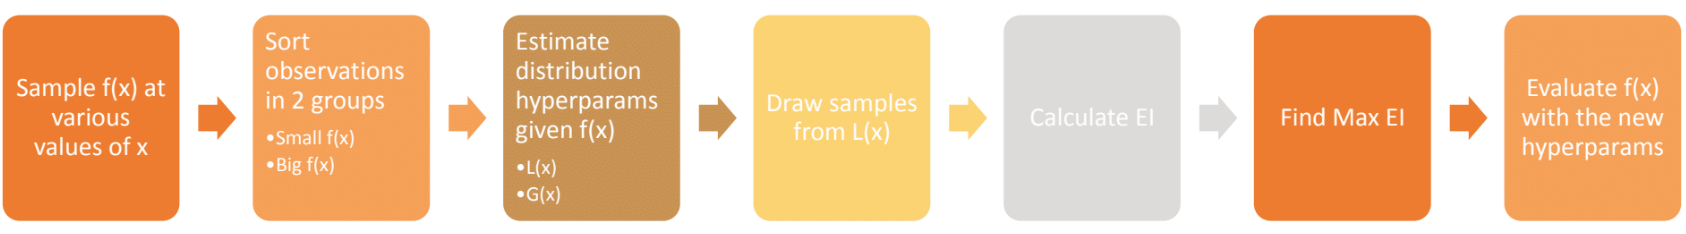

## Parzen Windows

**Parzen windows** is a non-parametric technique used in statistics and machine learning for estimating the probability density function (PDF) of a random variable. It helps in understanding the distribution of data points in a dataset. Here’s a simplified explanation:

**Basic Idea:** Parzen windows take data points and use them to create a smooth curve that represents how likely it is to find a value in a certain range. Instead of assuming a specific distribution (like normal or uniform), Parzen windows estimate the density directly from the data.

**How It Works:**

* Each data point contributes to the estimate of the density. When a data point is observed, a "window" or "kernel" is placed around it. This window defines how much influence that point has on the density estimate in nearby regions.
* The most common choice for the kernel is a Gaussian (bell-shaped) curve, but other shapes can be used too (like uniform or triangular).
* The width of the window (often called bandwidth) determines how smooth or rough the estimated density curve will be. A smaller bandwidth makes the estimate more sensitive to individual data points, while a larger bandwidth smooths out the density estimate.

**Visual Representation:** Imagine you have a bunch of colored balls on a table (the data points). If you place a soft balloon (the window) over each ball, the balloons will overlap and create a shape that shows where the balls are concentrated. This shape represents the density of the balls on the table.

**Applications:** Parzen windows are often used in machine learning algorithms for tasks like classification, density estimation, and in hyperparameter optimization methods like TPE, where they help in modeling the distribution of hyperparameter values.

**SIDE NOTE**
In Parzen windows, the bandwidth parameter h (also known as the window size) plays a crucial role in determining the smoothness of the probability density estimate. Here’s what happens if h is small:

* **Increased Sensitivity:** A smaller bandwidth means that the contribution of each data point to the density estimate is concentrated over a very small area. This makes the estimate highly sensitive to individual data points.
* **Rough Density Estimate:** With a small h, the resulting density estimate tends to be jagged or rough. This is because the estimate will vary significantly between points, reflecting the noise and fluctuations in the data rather than the underlying distribution.

## TPE Overview

**TPE** (Tree-structured Parzen Estimator)
Underlying Model: TPE uses a probabilistic model based on Bayesian optimization. It creates two distributions: one for likely good hyperparameters (l(x)) that improve performance and another for likely poor ones (g(x)). TPE focuses on sampling from the region of good hyperparameters.

**Exploration vs. Exploitation:** TPE directly samples from the "likely good" region but introduces randomness by occasionally sampling from the "likely poor" region. This approach prevents the method from getting stuck in local optima.

**Hyperparameter Space:** TPE is flexible with various hyperparameter types, effectively handling conditional parameters. It builds its tree structure around these dependencies to optimize the search process.

**Efficiency:** TPE is highly efficient, especially in Bayesian optimization tasks. Its probabilistic nature allows it to quickly converge to effective hyperparameters without evaluating the entire search space.

**Strengths:** TPE performs well in smooth hyperparameter spaces and is particularly strong in Bayesian optimization tasks. It handles conditional hyperparameters and categorical values efficiently, often converging faster in well-behaved spaces.

**Use Cases:** Integrated into frameworks like Hyperopt, TPE is commonly used in Bayesian optimization tasks for machine learning algorithms, such as decision trees, neural networks, and SVMs. It is particularly popular in tuning neural networks, where smooth parameter spaces facilitate the probabilistic approach.

**Steps in TPE Optimization**

* **Initialization**: Start by defining the hyperparameter space and a set of initial hyperparameter configurations to evaluate the model’s performance.
* **Performance Evaluation**: For each set of hyperparameters, train the model and record the performance (e.g., accuracy, loss).
* **Modeling Distributions**: Using the recorded performance, fit l(x) to the hyperparameters that resulted in good performance and fit g(x) to the hyperparameters that resulted in poor performance.
* **Sampling Hyperparameters**: TPE samples new hyperparameters from the region of l(x) but incorporates randomness to sample from g(x), allowing exploration of the hyperparameter space.
* **Iteration**: Repeat the evaluation and sampling process, refining the model based on newly tested hyperparameters until a stopping criterion is met (e.g., a set number of iterations or convergence).

# Comparison

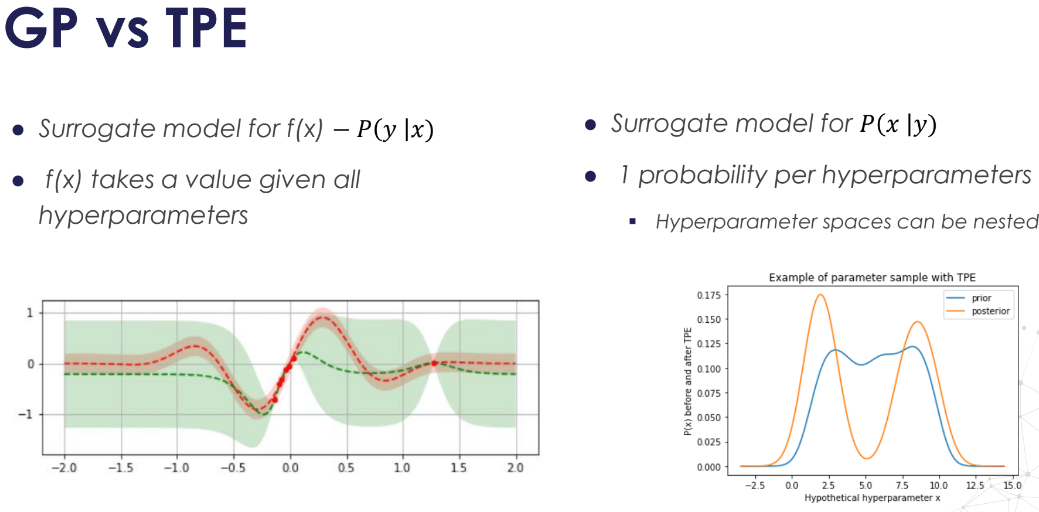

**TPE** (Tree-structured Parzen Estimator) focuses on regions of the hyperparameter space that are likely to yield better performance based on past tests. It builds two probabilistic models: one for good hyperparameters and one for bad ones. TPE primarily samples from the successful areas while occasionally exploring less successful regions.

**Gaussian Process** (GP) considers all hyperparameters at once. It creates a surrogate model that predicts performance across the entire space, evaluating multiple combinations simultaneously. This allows GP to explore interactions between hyperparameters effectively, balancing the search between known good areas and new possibilities.

**In shorts**
* TPE focuses on specific promising combinations, refining those over time, while still exploring others.
* GP considers all hyperparameters together and evaluates the entire space, allowing it to capture more complex interactions between hyperparameters.

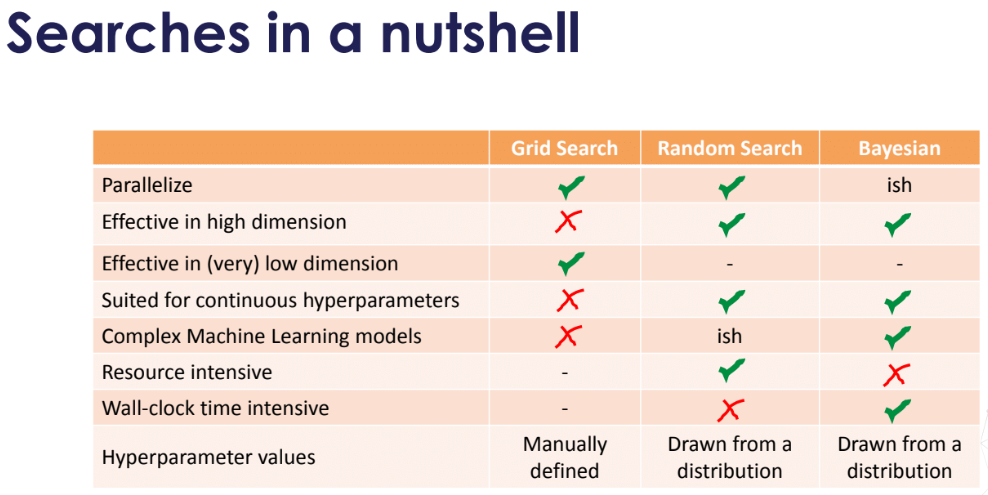

Parallelization in hyperparameter searches refers to running multiple hyperparameter evaluations simultaneously across different processing units (like CPUs or GPUs). This speeds up the search process because instead of testing one combination at a time, multiple combinations are evaluated in parallel. This approach is especially helpful when hyperparameter tuning takes a long time, such as training large models.

In **TPE** or **SMAC**, instead of evaluating one set of hyperparameters and waiting for the result before testing another, you can evaluate several sets of hyperparameters on different processors at the same time.

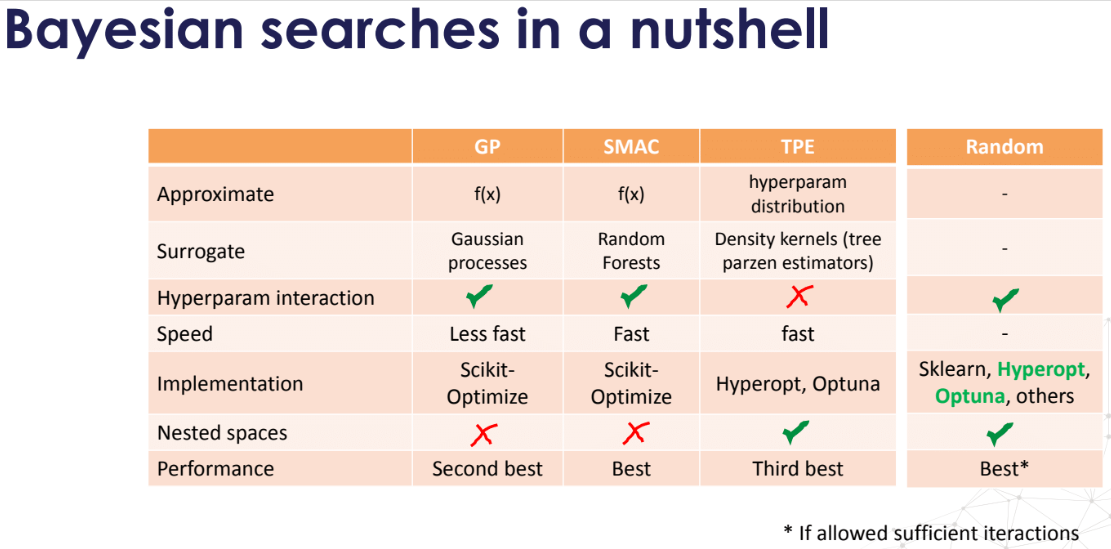

**Side note:** If we give a large hyper parameter space, then random search can be the best

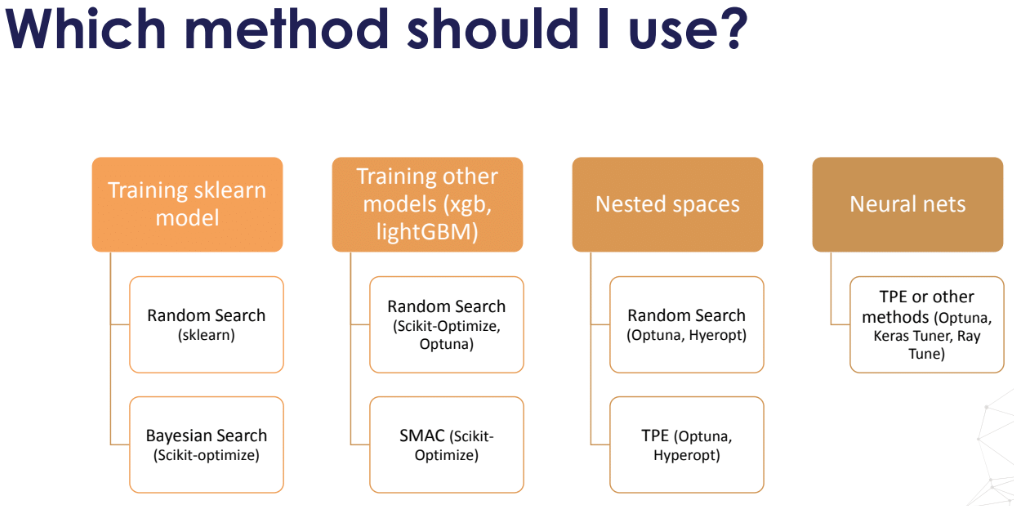

# Simulated Annealing

Improving Randomized Search Sequentially

Hyperopt has a search algorithm that they call Simulated annealing that starts with a randomized search, and then follows up by scanning hyperparameter values in the most promising areas, instead of completely at random.

**Simulated Annealing** (SA) is an optimization algorithm inspired by the process of heating and then slowly cooling metal to reduce defects, known as annealing. In optimization, the goal is to find the best solution (e.g., the optimal hyperparameters), and SA mimics this physical process to avoid getting stuck in poor solutions (local minima) and instead find a better global solution.

How it works:
* Start with an initial solution: The algorithm begins with a random solution and calculates its performance (e.g., accuracy of a model).

* Introduce random changes: A new solution is generated by making small random changes to the current solution.
Evaluate the new solution: The performance of the new solution is calculated.

* Decision to accept or reject:
If the new solution is better, it’s accepted.
If the new solution is worse, it might still be accepted with a probability that decreases over time (this is where the "annealing" comes in).
* Gradual cooling: The probability of accepting worse solutions decreases as the algorithm runs (simulating the cooling process). This allows the algorithm to explore a wide range of solutions at the beginning and gradually focus on fine-tuning.

**Benefits**:
* Helps avoid getting stuck in local optima by allowing bad moves (worse solutions) early on.
* Can be useful for complex optimization problems where other methods might get trapped in local optima.

In summary, Simulated Annealing explores the solution space broadly at first, then narrows down to the best solutions by reducing randomness over time, mimicking how materials cool and harden in physics.

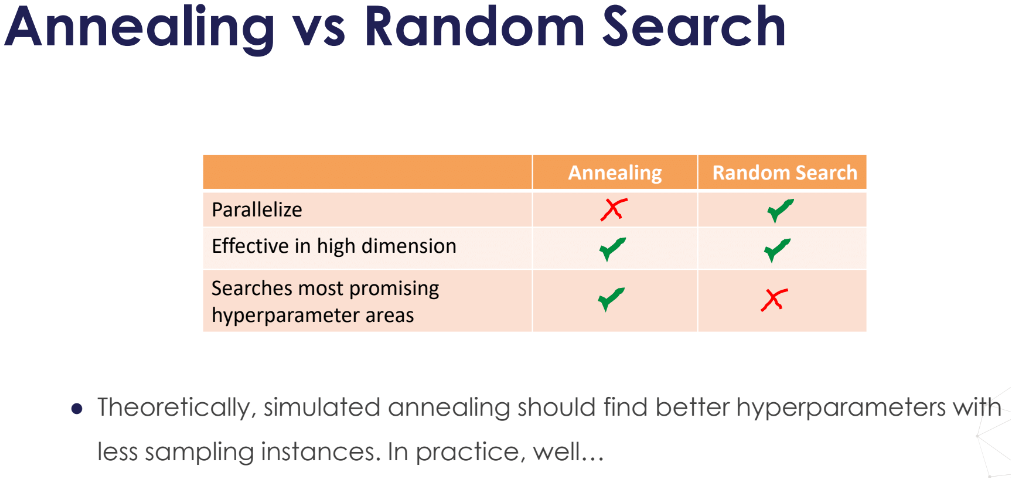

**Comparison**:
* Simulated Annealing (SA): Explores the entire combination of hyperparameters in each step but focuses on one combination at a time. As it runs, it becomes less likely to accept worse solutions. This means it searches one solution at a time but adjusts all hyperparameters in each solution.
* TPE: Focuses on regions of the hyperparameter space that have historically given good results. It evaluates combinations that are more likely to perform well.
* SMAC: Builds a surrogate model (e.g., decision trees) to predict how well different hyperparameter combinations will perform and balances exploring new regions and exploiting known good ones.
Where is Simulated Annealing used?
Simulated Annealing is used in:

Optimization problems that are difficult and may have multiple local optima (e.g., the traveling salesman problem, VLSI design).
Hyperparameter tuning for machine learning models, especially in simpler cases or when a broad, general approach is acceptable.
Combinatorial optimization problems where the solution space is discrete, such as neural network structure design or tuning models with fewer but more critical hyperparameters.
SA is typically used in scenarios where:

The problem is complex and finding a global optimum is crucial.
You want a relatively simple and general-purpose optimization algorithm.

In [ ]:
# Step 1: Import the required libraries for dataset, metrics, and model evaluation
# This loads the dataset, calculates accuracy, and provides train-test splits.
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Step 2: Import XGBoost and hyperopt libraries
# XGBoost for modeling, hyperopt for hyperparameter search.
import xgboost as xgb
from hyperopt import hp, anneal, rand, fmin, Trials

# Step 3: Hyperopt-specific functions
# hp: defines the hyperparameter search space
# rand: performs random search
# anneal: applies simulated annealing
# fmin: performs the optimization to minimize the objective function
# Trials: tracks and evaluates the search results

# Step 4: Define the hyperparameter space
# This defines the range of hyperparameters to explore for the model.
param_grid = {
    'n_estimators': hp.quniform('n_estimators', 200, 2500, 100),  # n_estimators: Number of boosting rounds.
    'max_depth': hp.uniform('max_depth', 1, 10),  # max_depth: Maximum depth of the trees.
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.99),  # learning_rate: Step size shrinkage.
    'booster': hp.choice('booster', ['gbtree', 'dart']),  # booster: Choice of boosting algorithm.
    'gamma': hp.quniform('gamma', 0.01, 10, 0.1),  # gamma: Minimum loss reduction to make a split.
    'subsample': hp.uniform('subsample', 0.50, 0.90),  # subsample: Proportion of data to sample for training.
    'colsample_bytree': hp.uniform('colsample_bytree', 0.50, 0.99),  # colsample_bytree: Fraction of features to sample for each tree.
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.50, 0.99),  # colsample_bylevel: Fraction of features to sample per level.
    'colsample_bynode': hp.uniform('colsample_bynode', 0.50, 0.99),  # colsample_bynode: Fraction of features to sample per split node.
    'reg_lambda': hp.uniform('reg_lambda', 1, 20)  # reg_lambda: L2 regularization term on weights.
}

In [ ]:
# Step 1: Define the objective function that takes the hyperparameter space as input
# This function returns the score (accuracy) for a given set of hyperparameters.
def objective(params):

    # Step 2: Create a dictionary that maps each parameter from the search space
    # to the corresponding hyperparameters for the XGBoost classifier.
    params_dict = {
        'n_estimators': int(params['n_estimators']),  # n_estimators must be an integer (rounds of boosting)
        'max_depth': int(params['max_depth']),  # max_depth must also be an integer (tree depth)
        'learning_rate': params['learning_rate'],  # learning_rate: controls the step size of updates
        'booster': params['booster'],  # booster: which boosting algorithm to use
        'gamma': params['gamma'],  # gamma: minimum loss reduction for splits
        'subsample': params['subsample'],  # subsample: proportion of training data to sample
        'colsample_bytree': params['colsample_bytree'],  # colsample_bytree: features to sample for each tree
        'colsample_bylevel': params['colsample_bylevel'],  # colsample_bylevel: features to sample per tree level
        'colsample_bynode': params['colsample_bynode'],  # colsample_bynode: features to sample per split node
        'random_state': 1000,  # random_state: ensures reproducibility
    }

    # Step 3: Pass the hyperparameters from the dictionary to the XGBoost model
    # This initializes the model with the hyperparameters.
    gbm = xgb.XGBClassifier(**params_dict)

    # Step 4: Perform cross-validation using 5-folds and calculate the average accuracy
    # The function uses accuracy as the performance metric.
    score = cross_val_score(gbm, X_train, y_train,
                            scoring='accuracy', cv=5, n_jobs=4).mean()

    # Step 5: Since fmin minimizes the objective, return the negative accuracy
    # This allows the optimization to find the maximum accuracy.
    return -score

In [ ]:
# Step 1: Initialize the Trials object to store the hyperparameter search results
# This will track all the hyperparameter combinations and their corresponding results.
trials_anneal = Trials()

# Step 2: Perform hyperparameter search using simulated annealing
# fmin minimizes the objective function and searches for the best parameters using anneal.suggest.
anneal_search = fmin(
    fn=objective,  # Objective function to minimize
    space=param_grid,  # Hyperparameter space
    max_evals=30,  # Number of evaluations (iterations)
    rstate=np.random.default_rng(42),  # Random state for reproducibility
    algo=anneal.suggest,  # Use simulated annealing as the optimization algorithm
    trials=trials_anneal,  # Store results in Trials object
)

# Step 3: Display the best hyperparameters found during the search
anneal_search

# Step 4: Concatenate and organize the trials data into a DataFrame
# This combines the hyperparameters and results into one DataFrame, sorted by loss.
results = pd.concat([
    pd.DataFrame(trials_anneal.vals),  # Hyperparameter values
    pd.DataFrame(trials_anneal.results)  # Results (e.g., loss)
], axis=1).sort_values(by='loss', ascending=False).reset_index(drop=True)

# Step 5: Plot the accuracy (negative loss) over different hyperparameter combinations
results['loss'].plot()
plt.ylabel('Accuracy')  # Y-axis label for accuracy
plt.xlabel('Hyperparam combination')  # X-axis label for hyperparameter combinations
plt.title("Simulated annealing")  # Title for the plot
plt.show()

# Step 6: Get the minimum loss (best accuracy) from the trials results
pd.DataFrame(trials_anneal.results)['loss'].min()

**Additional references**
* [Source Codes for TPE & SMAC](https://github.com/solegalli/hyperparameter-optimization/blob/master/Section-07-Other-SMBO-Models/01-SMAC-Scikit-Optimize-CNN.ipynb)